In [172]:
from datetime import datetime
from elasticsearch import Elasticsearch
from pandas import DataFrame, Series
import pandas as pd

In [173]:
es = Elasticsearch(['localhost:9212'])

In [174]:
res = es.search(index='user_live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "lte": "now"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            
print (res)

{'took': 968, 'timed_out': False, '_shards': {'total': 5, 'successful': 5, 'failed': 0}, 'hits': {'total': 3104673, 'max_score': 0.0, 'hits': []}, 'aggregations': {'days': {'buckets': [{'key_as_string': 'Wed Jun 07 17:00:00 +0000 2017', 'key': 1496854800000, 'doc_count': 1}, {'key_as_string': 'Wed Jun 07 18:00:00 +0000 2017', 'key': 1496858400000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 19:00:00 +0000 2017', 'key': 1496862000000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 20:00:00 +0000 2017', 'key': 1496865600000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 21:00:00 +0000 2017', 'key': 1496869200000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 22:00:00 +0000 2017', 'key': 1496872800000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 23:00:00 +0000 2017', 'key': 1496876400000, 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 00:00:00 +0000 2017', 'key': 1496880000000, 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 01:00:00 +0000 2017', 'key': 1496883600000, 'doc_count': 

In [175]:
buckets = (res['aggregations']['days']['buckets'])
print(buckets)


[{'key_as_string': 'Wed Jun 07 17:00:00 +0000 2017', 'key': 1496854800000, 'doc_count': 1}, {'key_as_string': 'Wed Jun 07 18:00:00 +0000 2017', 'key': 1496858400000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 19:00:00 +0000 2017', 'key': 1496862000000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 20:00:00 +0000 2017', 'key': 1496865600000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 21:00:00 +0000 2017', 'key': 1496869200000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 22:00:00 +0000 2017', 'key': 1496872800000, 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 23:00:00 +0000 2017', 'key': 1496876400000, 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 00:00:00 +0000 2017', 'key': 1496880000000, 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 01:00:00 +0000 2017', 'key': 1496883600000, 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 02:00:00 +0000 2017', 'key': 1496887200000, 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 03:00:00 +0000 2017', 'key': 1496890800000, 'doc_count': 0}

In [176]:
for element in buckets: 
        del element['key'] 

print (buckets)

[{'key_as_string': 'Wed Jun 07 17:00:00 +0000 2017', 'doc_count': 1}, {'key_as_string': 'Wed Jun 07 18:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 19:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 20:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 21:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 22:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Wed Jun 07 23:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 00:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 01:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 02:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 03:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 04:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Jun 08 05:00:00 +0000 2017', 'doc_count': 4162}, {'key_as_string': 'Thu Jun 08 06:00:00 +0000 2017', 'doc_count': 12300}, {'key_as_string': 'Thu Jun

In [177]:
df = pd.DataFrame(buckets,columns=['key_as_string', 'doc_count'])
df.columns = ['date', 'doc_count']

print(df)
print(df.index.name)

                                date  doc_count
0     Wed Jun 07 17:00:00 +0000 2017          1
1     Wed Jun 07 18:00:00 +0000 2017          0
2     Wed Jun 07 19:00:00 +0000 2017          0
3     Wed Jun 07 20:00:00 +0000 2017          0
4     Wed Jun 07 21:00:00 +0000 2017          0
5     Wed Jun 07 22:00:00 +0000 2017          0
6     Wed Jun 07 23:00:00 +0000 2017          0
7     Thu Jun 08 00:00:00 +0000 2017          0
8     Thu Jun 08 01:00:00 +0000 2017          0
9     Thu Jun 08 02:00:00 +0000 2017          0
10    Thu Jun 08 03:00:00 +0000 2017          0
11    Thu Jun 08 04:00:00 +0000 2017          0
12    Thu Jun 08 05:00:00 +0000 2017       4162
13    Thu Jun 08 06:00:00 +0000 2017      12300
14    Thu Jun 08 07:00:00 +0000 2017      16231
15    Thu Jun 08 08:00:00 +0000 2017       5962
16    Thu Jun 08 09:00:00 +0000 2017          0
17    Thu Jun 08 10:00:00 +0000 2017          0
18    Thu Jun 08 11:00:00 +0000 2017          0
19    Thu Jun 08 12:00:00 +0000 2017    

In [178]:
res2 = es.search(index='live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "lte": "now"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            

In [179]:
buckets2 = (res2['aggregations']['days']['buckets'])

In [180]:
for element in buckets2: 
        del element['key'] 


In [181]:
df2 = pd.DataFrame(buckets2,columns=['key_as_string', 'doc_count'])
df2.columns = ['date', 'doc_count']


In [182]:
df3 = df.merge(df2, on='date')

In [183]:
df3.columns = ['date', 'doc_count_bot', 'doc_count_human']

In [184]:
df3

,date,doc_count_bot,doc_count_human
0,Wed Jun 07 17:00:00 +0000 2017,1,369
1,Wed Jun 07 18:00:00 +0000 2017,0,412
2,Wed Jun 07 19:00:00 +0000 2017,0,305
3,Wed Jun 07 20:00:00 +0000 2017,0,217
4,Wed Jun 07 21:00:00 +0000 2017,0,202
5,Wed Jun 07 22:00:00 +0000 2017,0,174
6,Wed Jun 07 23:00:00 +0000 2017,0,207
7,Thu Jun 08 00:00:00 +0000 2017,0,179
8,Thu Jun 08 01:00:00 +0000 2017,0,175
9,Thu Jun 08 02:00:00 +0000 2017,0,143


In [185]:
df3['total_tweets'] = df3['doc_count_bot'] + df3['doc_count_human']

In [186]:
df3

,date,doc_count_bot,doc_count_human,total_tweets
0,Wed Jun 07 17:00:00 +0000 2017,1,369,370
1,Wed Jun 07 18:00:00 +0000 2017,0,412,412
2,Wed Jun 07 19:00:00 +0000 2017,0,305,305
3,Wed Jun 07 20:00:00 +0000 2017,0,217,217
4,Wed Jun 07 21:00:00 +0000 2017,0,202,202
5,Wed Jun 07 22:00:00 +0000 2017,0,174,174
6,Wed Jun 07 23:00:00 +0000 2017,0,207,207
7,Thu Jun 08 00:00:00 +0000 2017,0,179,179
8,Thu Jun 08 01:00:00 +0000 2017,0,175,175
9,Thu Jun 08 02:00:00 +0000 2017,0,143,143


In [187]:
df3['percent_bot'] = (df3['doc_count_bot']/df3['total_tweets']) * 100
pd.options.display.float_format = '{:,.2f}'.format
df3['percent_human'] = (df3['doc_count_human']/df3['total_tweets']) * 100

df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human
0,Wed Jun 07 17:00:00 +0000 2017,1,369,370,0.27,99.73
1,Wed Jun 07 18:00:00 +0000 2017,0,412,412,0.00,100.00
2,Wed Jun 07 19:00:00 +0000 2017,0,305,305,0.00,100.00
3,Wed Jun 07 20:00:00 +0000 2017,0,217,217,0.00,100.00
4,Wed Jun 07 21:00:00 +0000 2017,0,202,202,0.00,100.00
5,Wed Jun 07 22:00:00 +0000 2017,0,174,174,0.00,100.00
6,Wed Jun 07 23:00:00 +0000 2017,0,207,207,0.00,100.00
7,Thu Jun 08 00:00:00 +0000 2017,0,179,179,0.00,100.00
8,Thu Jun 08 01:00:00 +0000 2017,0,175,175,0.00,100.00
9,Thu Jun 08 02:00:00 +0000 2017,0,143,143,0.00,100.00


In [188]:
df3['date'] = pd.to_datetime(df3['date'])

In [189]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

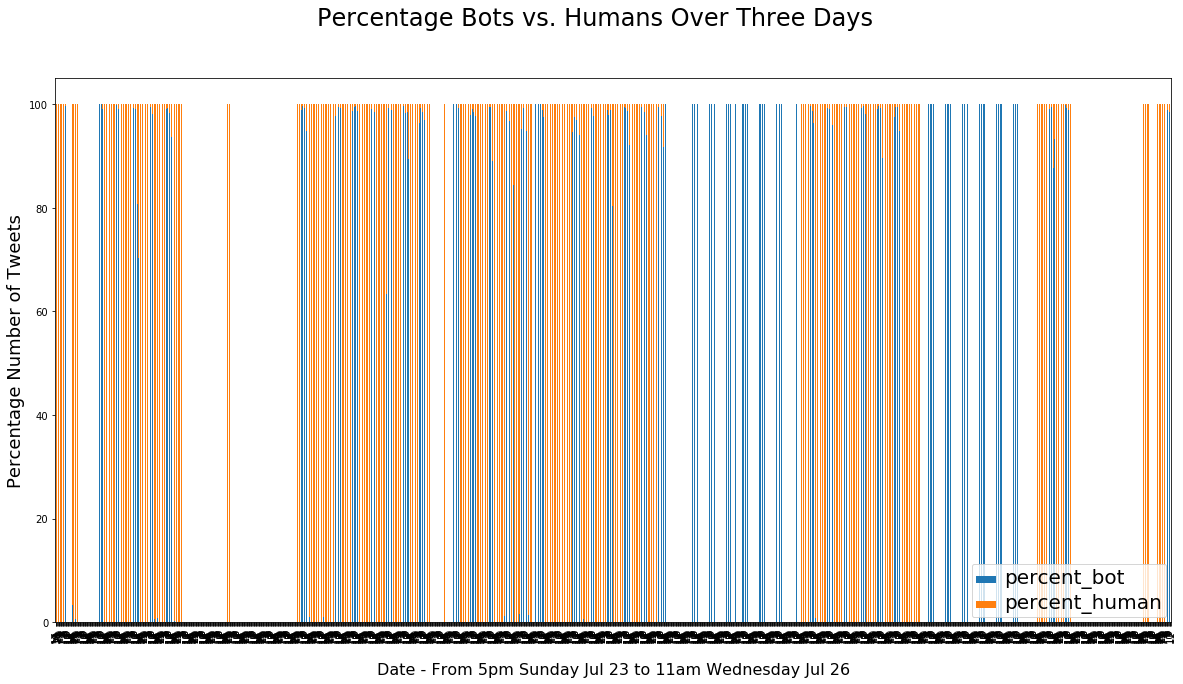

In [190]:
plt.figure();
df3.plot(x=df3['date'].dt.hour, y=["percent_bot", "percent_human"],stacked=True, kind="bar",figsize=(20,10))
plt.xlabel('Date - From 5pm Sunday Jul 23 to 11am Wednesday Jul 26', fontsize = 16, labelpad=20)
plt.ylabel('Percentage Number of Tweets', fontsize='18')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') #legend 'list' fontsize
plt.suptitle('Percentage Bots vs. Humans Over Three Days', fontsize='24')
plt.show()


In [191]:
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human
0,2017-06-07 17:00:00,1,369,370,0.27,99.73
1,2017-06-07 18:00:00,0,412,412,0.00,100.00
2,2017-06-07 19:00:00,0,305,305,0.00,100.00
3,2017-06-07 20:00:00,0,217,217,0.00,100.00
4,2017-06-07 21:00:00,0,202,202,0.00,100.00
5,2017-06-07 22:00:00,0,174,174,0.00,100.00
6,2017-06-07 23:00:00,0,207,207,0.00,100.00
7,2017-06-08 00:00:00,0,179,179,0.00,100.00
8,2017-06-08 01:00:00,0,175,175,0.00,100.00
9,2017-06-08 02:00:00,0,143,143,0.00,100.00


In [192]:
df3['normalize_bot'] = (df3['doc_count_bot'] - min(df3['doc_count_bot']))/(max(df3['doc_count_bot'])-min(df3['doc_count_bot']))

In [193]:
df3


,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot
0,2017-06-07 17:00:00,1,369,370,0.27,99.73,0.00
1,2017-06-07 18:00:00,0,412,412,0.00,100.00,0.00
2,2017-06-07 19:00:00,0,305,305,0.00,100.00,0.00
3,2017-06-07 20:00:00,0,217,217,0.00,100.00,0.00
4,2017-06-07 21:00:00,0,202,202,0.00,100.00,0.00
5,2017-06-07 22:00:00,0,174,174,0.00,100.00,0.00
6,2017-06-07 23:00:00,0,207,207,0.00,100.00,0.00
7,2017-06-08 00:00:00,0,179,179,0.00,100.00,0.00
8,2017-06-08 01:00:00,0,175,175,0.00,100.00,0.00
9,2017-06-08 02:00:00,0,143,143,0.00,100.00,0.00


In [194]:
df3['normalize_human'] = (df3['doc_count_human'] - min(df3['doc_count_human']))/(max(df3['doc_count_human'])-min(df3['doc_count_human']))
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human
0,2017-06-07 17:00:00,1,369,370,0.27,99.73,0.00,0.45
1,2017-06-07 18:00:00,0,412,412,0.00,100.00,0.00,0.50
2,2017-06-07 19:00:00,0,305,305,0.00,100.00,0.00,0.37
3,2017-06-07 20:00:00,0,217,217,0.00,100.00,0.00,0.27
4,2017-06-07 21:00:00,0,202,202,0.00,100.00,0.00,0.25
5,2017-06-07 22:00:00,0,174,174,0.00,100.00,0.00,0.21
6,2017-06-07 23:00:00,0,207,207,0.00,100.00,0.00,0.25
7,2017-06-08 00:00:00,0,179,179,0.00,100.00,0.00,0.22
8,2017-06-08 01:00:00,0,175,175,0.00,100.00,0.00,0.21
9,2017-06-08 02:00:00,0,143,143,0.00,100.00,0.00,0.17


In [200]:
df3['normalize_total'] = (df3['total_tweets'] - min(df3['total_tweets']))/(max(df3['total_tweets'])-min(df3['total_tweets']))
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human,moving_avg_bot,moving_avg_human,normalize_total
0,2017-06-07 17:00:00,1,369,370,0.27,99.73,0.00,0.45,nan,nan,0.02
1,2017-06-07 18:00:00,0,412,412,0.00,100.00,0.00,0.50,0.00,0.48,0.02
2,2017-06-07 19:00:00,0,305,305,0.00,100.00,0.00,0.37,0.00,0.44,0.02
3,2017-06-07 20:00:00,0,217,217,0.00,100.00,0.00,0.27,0.00,0.32,0.01
4,2017-06-07 21:00:00,0,202,202,0.00,100.00,0.00,0.25,0.00,0.26,0.01
5,2017-06-07 22:00:00,0,174,174,0.00,100.00,0.00,0.21,0.00,0.23,0.01
6,2017-06-07 23:00:00,0,207,207,0.00,100.00,0.00,0.25,0.00,0.23,0.01
7,2017-06-08 00:00:00,0,179,179,0.00,100.00,0.00,0.22,0.00,0.24,0.01
8,2017-06-08 01:00:00,0,175,175,0.00,100.00,0.00,0.21,0.00,0.22,0.01
9,2017-06-08 02:00:00,0,143,143,0.00,100.00,0.00,0.17,0.00,0.19,0.01


In [195]:
df3['moving_avg_bot'] = df3['normalize_bot'].rolling(window=2).mean()
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human,moving_avg_bot
0,2017-06-07 17:00:00,1,369,370,0.27,99.73,0.00,0.45,nan
1,2017-06-07 18:00:00,0,412,412,0.00,100.00,0.00,0.50,0.00
2,2017-06-07 19:00:00,0,305,305,0.00,100.00,0.00,0.37,0.00
3,2017-06-07 20:00:00,0,217,217,0.00,100.00,0.00,0.27,0.00
4,2017-06-07 21:00:00,0,202,202,0.00,100.00,0.00,0.25,0.00
5,2017-06-07 22:00:00,0,174,174,0.00,100.00,0.00,0.21,0.00
6,2017-06-07 23:00:00,0,207,207,0.00,100.00,0.00,0.25,0.00
7,2017-06-08 00:00:00,0,179,179,0.00,100.00,0.00,0.22,0.00
8,2017-06-08 01:00:00,0,175,175,0.00,100.00,0.00,0.21,0.00
9,2017-06-08 02:00:00,0,143,143,0.00,100.00,0.00,0.17,0.00


In [196]:
df3['moving_avg_human'] = df3['normalize_human'].rolling(window=2).mean()
df3


,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human,moving_avg_bot,moving_avg_human
0,2017-06-07 17:00:00,1,369,370,0.27,99.73,0.00,0.45,nan,nan
1,2017-06-07 18:00:00,0,412,412,0.00,100.00,0.00,0.50,0.00,0.48
2,2017-06-07 19:00:00,0,305,305,0.00,100.00,0.00,0.37,0.00,0.44
3,2017-06-07 20:00:00,0,217,217,0.00,100.00,0.00,0.27,0.00,0.32
4,2017-06-07 21:00:00,0,202,202,0.00,100.00,0.00,0.25,0.00,0.26
5,2017-06-07 22:00:00,0,174,174,0.00,100.00,0.00,0.21,0.00,0.23
6,2017-06-07 23:00:00,0,207,207,0.00,100.00,0.00,0.25,0.00,0.23
7,2017-06-08 00:00:00,0,179,179,0.00,100.00,0.00,0.22,0.00,0.24
8,2017-06-08 01:00:00,0,175,175,0.00,100.00,0.00,0.21,0.00,0.22
9,2017-06-08 02:00:00,0,143,143,0.00,100.00,0.00,0.17,0.00,0.19


In [197]:
df4 = df3[['date','moving_avg_bot','moving_avg_human']].copy()

In [198]:
df4


,date,moving_avg_bot,moving_avg_human
0,2017-06-07 17:00:00,nan,nan
1,2017-06-07 18:00:00,0.00,0.48
2,2017-06-07 19:00:00,0.00,0.44
3,2017-06-07 20:00:00,0.00,0.32
4,2017-06-07 21:00:00,0.00,0.26
5,2017-06-07 22:00:00,0.00,0.23
6,2017-06-07 23:00:00,0.00,0.23
7,2017-06-08 00:00:00,0.00,0.24
8,2017-06-08 01:00:00,0.00,0.22
9,2017-06-08 02:00:00,0.00,0.19


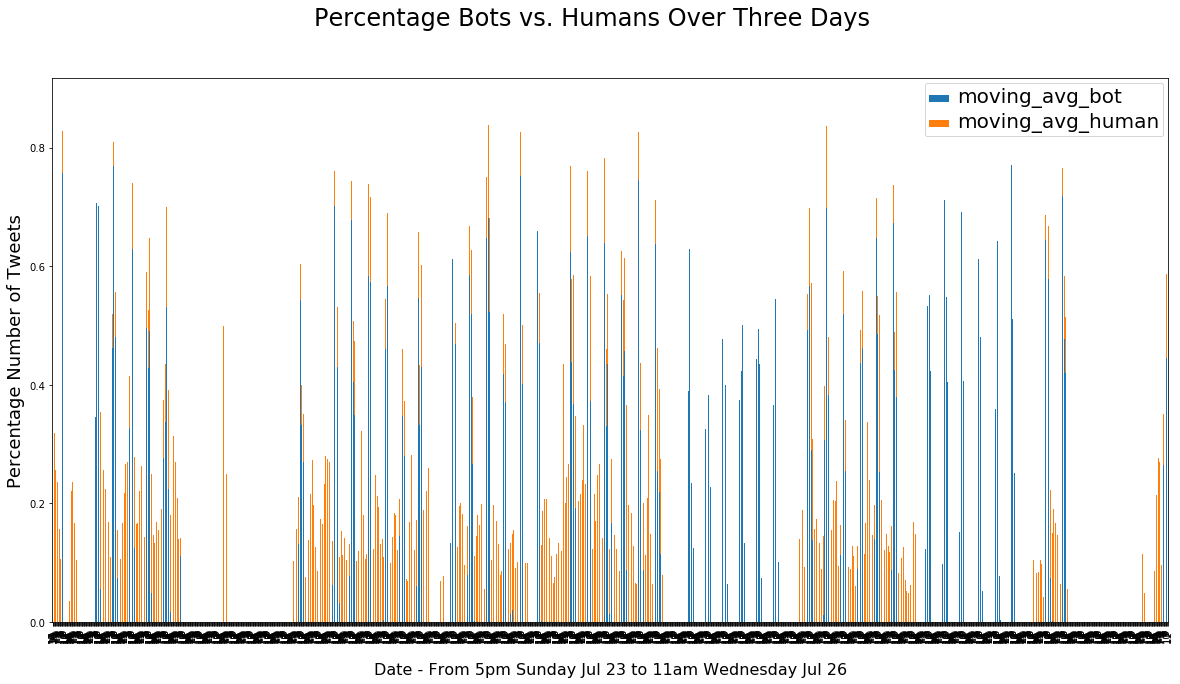

In [199]:
plt.figure();
df4.plot(x=df4['date'].dt.hour, y=["moving_avg_bot", "moving_avg_human"],stacked=True, kind="bar",figsize=(20,10))
plt.xlabel('Date - From 5pm Sunday Jul 23 to 11am Wednesday Jul 26', fontsize = 16, labelpad=20)
plt.ylabel('Percentage Number of Tweets', fontsize='18')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') #legend 'list' fontsize
plt.suptitle('Percentage Bots vs. Humans Over Three Days', fontsize='24')
plt.show()